In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [38]:
X_train_full.shape

(60000, 28, 28)

In [39]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [40]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [41]:
class_names[y_train[0]]

'Coat'

In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.layers


In [45]:
hidden1 = model.layers[1]


In [46]:
hidden1.name

'dense_6'

In [48]:
model.get_layer('dense_6')


In [49]:
weights, biases = hidden1.get_weights()
weights


array([[-0.0304813 ,  0.00300378,  0.07172889, ..., -0.02157966,
         0.04857703, -0.01175059],
       [-0.0622773 , -0.01517599, -0.01615812, ...,  0.00715925,
         0.02626134,  0.06960233],
       [-0.06013446, -0.06741465, -0.06812897, ...,  0.02231828,
         0.01070912,  0.01319475],
       ...,
       [-0.00838617, -0.00559483,  0.00609954, ..., -0.02864598,
        -0.07297347,  0.0682247 ],
       [-0.04819962, -0.05641821, -0.06926289, ...,  0.07113275,
         0.06767601, -0.03180903],
       [ 0.04879975,  0.04818524, -0.0549868 , ..., -0.00735601,
        -0.05064461,  0.04747707]], dtype=float32)

In [50]:
weights.shape

(784, 300)

In [51]:
biases


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [52]:
biases.shape

(300,)

In [53]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [54]:
history = model.fit(X_train, y_train, epochs=30,
validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7178 - accuracy: 0.7654 - val_loss: 0.5243 - val_accuracy: 0.8204
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4893 - accuracy: 0.8297 - val_loss: 0.4602 - val_accuracy: 0.8392
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4449 - accuracy: 0.8435 - val_loss: 0.4256 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4172 - accuracy: 0.8529 - val_loss: 0.4033 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3971 - accuracy: 0.8592 - val_loss: 0.4025 - val_accuracy: 0.8580
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3825 - accuracy: 0.8650 - val_loss: 0.3802 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3675 - accuracy: 0.8686 - val_loss: 0.3718 - val_accuracy

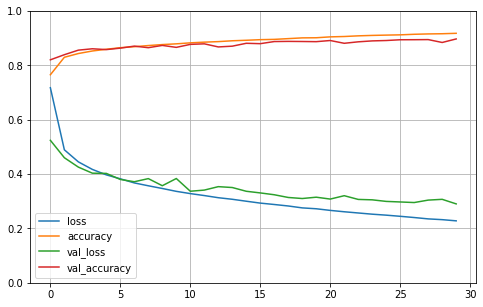

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 60.1726 - accuracy: 0.8544


[60.17264938354492, 0.8543999791145325]

In [57]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 55ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [58]:
y_pred = model.predict(X_new)
y_pred


1/1 [==============================] - 0s 22ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [61]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)